In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

## Ecuaciones de una variable:

Para los siguiente problemas: 


## 1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}

El problema puede ser expresado con la siguiente relación:

$$A_a - A_\Delta = \frac{\pi R^2}{4} \quad  (1)$$

donde $A_a$ es el área de un sector circular de ángulo theta y, por lo tanto, es equivalente a $\frac{\theta R^2}{2}$. $A_\Delta$ es el área del triángulo que se forma trazando un segmento recto entre la intersección de los límites del ángulo y la circunferencia, luego: 

$$ A_\Delta = \frac{altura * base}{2} \implies A_\Delta = r^2 \cos(\textstyle\frac{\theta}{2}) \sin(\textstyle\frac{\theta}{2}) $$

$$ \therefore A_\Delta = r^2 \frac{\sin(\theta)}{2} $$

Por su parte el lado derecho corresponde a la condición del cuarto de área de una circunferencia de radio $R$

Reeplazando $A_a$ y $A_\Delta$ en $(1)$ obtenemos:

$$\frac{R^2}{2} \theta - \frac{R^2}{2} \sin(\theta)= \frac{R^2}{2} \frac{\pi}{2}  $$

$$\iff \theta - \sin \theta = \frac{\pi}{2} $$

- Construya una grafica para theta, ¿Alrededor de que punto esta solución? Para este punto se recomienda emplear un data frame de pandas

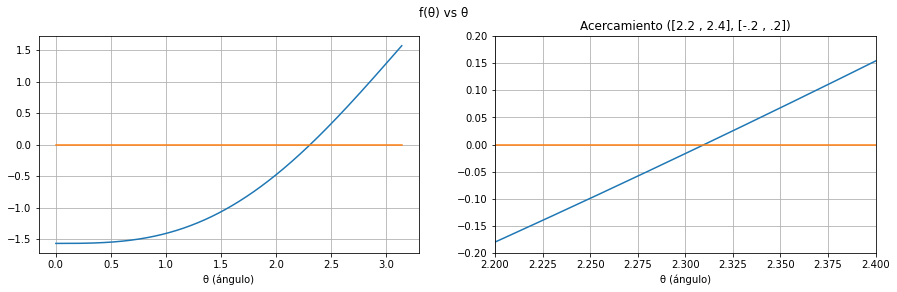

In [68]:
N = 1000
θini = 0
θfin = np.pi
θ = np.linspace(θini, θfin, N)

fun = lambda θ: θ - np.sin(θ) - np.pi/2 

df = pd.DataFrame({'theta':θ, 'funcion':fun(θ)})

#Gráfica
fig, ax = plt.subplots(1,2, figsize=(15,4))
fig.suptitle('f(θ) vs θ')
ax[0].plot(df.theta, df.funcion)
ax[0].plot([θini, θfin] , [0,0])
# ax[0].set_title('f(θ) vs θ')
ax[0].set_xlabel('θ (ángulo)')
ax[0].set_ylabel('')
ax[0].grid()

ax[1].plot(df.theta, df.funcion)
ax[1].plot([θini, θfin] , [0,0])
ax[1].set_title('Acercamiento ([2.2 , 2.4], [-.2 , .2])')
ax[1].set_xlabel('θ (ángulo)')
ax[1].set_ylabel('')
ax[1].set_ylim(-.2,.2)
ax[1].set_xlim(2.2,2.4)
ax[1].grid()

 - Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

In [27]:
fun = lambda θ: θ - np.sin(θ) - np.pi/2 

sol_bisec = optimize.bisect(fun,1,3) #Método de bisección.

g = lambda θ: θ - fun(θ) 
sol_fijo = optimize.fixed_point(g, 0) #Método del punto fijo.

sol_sec = optimize.newton(fun, -1) #Método de la secante

dθ_fun = lambda θ: 1 - np.cos(θ)
sol_NR = optimize.newton(fun, -1, fprime=dθ_fun) # Método de Newton. 

print (f'Método Bisección:  {sol_bisec:.3f}')
print (f'Método Punto fijo: {sol_fijo:.3f}')
print (f'Método NR:         {sol_NR:.3f}')
print (f'Método Secante:    {sol_sec:.3f}')

Método Bisección:  2.310
Método Punto fijo: 2.310
Método NR:         2.310
Método Secante:    2.310


## 2.0 
_An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass $m$ is dropped from a height $s_0$ and that the height of the
object after $t$ seconds is_

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t + \frac{m^2g}{k^2}(1-e^{-kt/m})
\end{equation}

_where $g = 32.17 \frac{ft}{s_2}$ and $k$ represents the coefficient of air resistance in $\frac{lbs}{ft}$. Suppose $s_0 = 300 ft, m = 0.25 lb$, and $k = 0.1 \frac{lbs}{ft}$. Find, to within $0.01 s$, the time it takes this quarter-pounder to hit the
ground._

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.


Método Bisección:  2.25s
Método Punto fijo: 2.25s
Método NR:         2.25s
Método Secante:    2.25s


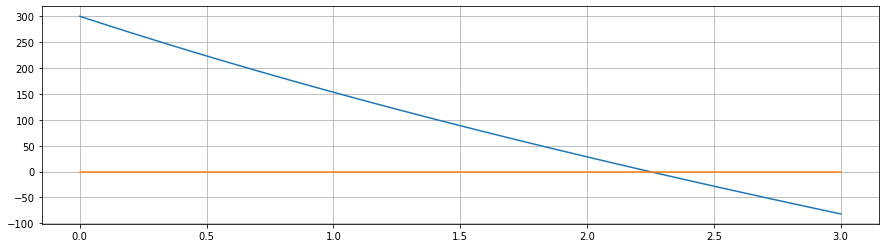

In [65]:
g = 32.17
s0 = 300
m = 0.25
k = 0.1

altura = lambda t: s0 - m*g*t/k - m*m*g/(k**2)*(1-np.exp(-(k*t/m)))  

sol_alt_bisec = optimize.bisect(altura,1,5) #Método de bisección.

g_altura = lambda t: t - altura(t) 
sol_alt_fijo = optimize.fixed_point(g_altura, 3) #Método del punto fijo.

sol_alt_sec = optimize.newton(altura, 1) #Método de la secante.

dt_alt = lambda t: ((2*t*np.exp(-k*t/m) + t*t*(-k/m)*np.exp(-k*t/m)) -2*t - 1)*(m*g/k)
sol_alt_NR = optimize.newton(altura, 1, fprime=dt_alt) # Método de Newton. 

print (f'Método Bisección:  {sol_alt_bisec:.2f}s')
print (f'Método Punto fijo: {sol_alt_fijo:.2f}s')
print (f'Método NR:         {sol_alt_NR:.2f}s')
print (f'Método Secante:    {sol_alt_sec:.2f}s')

# GRAFICA AUXILIAR
t = np.linspace(0,3,50)
plt.figure(figsize=(15,4))
plt.plot(t,altura(t))
plt.plot([0,3],[0,0])
plt.grid()

## 3.0 
En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m = \tanh\left ( \frac{m}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante, muestre su resultado con 4 cifras.



In [19]:
T = 0.5
mag = lambda m: np.tanh(m/T) - m  

sol_mag_sec = optimize.newton(mag, 1) #Método de la secante.
print(f'Solución: {sol_mag_sec:.4f}')

Solución: 0.9575


b. Valide su respuesta con el metodo de punto fijo, muestre su resultado con 4 cifras.



In [8]:
g_mag = lambda m: m - mag(m) 
sol_mag_fijo = optimize.fixed_point(g_mag, 3) #Método del punto fijo.
print(f'Solución: {sol_mag_fijo:.4f}')

Solución: 0.9575


d. Defina $T = $np.linspace$($ 0.1,0.99,100 $)$, y emple el método de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

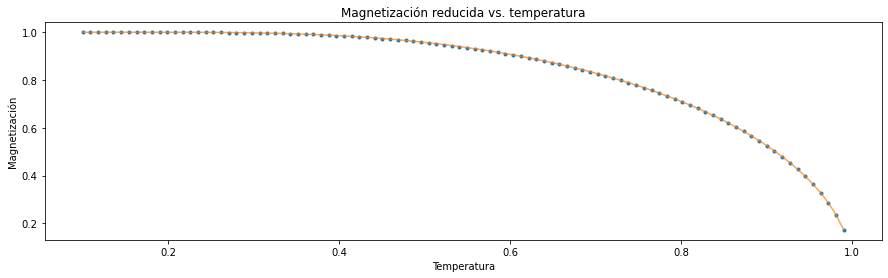

In [72]:
sol_mag_general = np.zeros(100)

T = np.linspace(0.1, .99, 100)

for i, TT in enumerate(T):
    T = TT
    sol_mag_general[i] = optimize.newton(mag, 2)  #Método de la secante.

T= np.linspace(0.1, .99, 100)

plt.figure(figsize=(15,4))
plt.plot(T, sol_mag_general, '.')
plt.plot(T, sol_mag_general, '-C1', alpha = 0.7)
plt.title('Magnetización reducida vs. temperatura')
plt.ylabel('Magnetización')
plt.xlabel('Temperatura')
plt.show()

## 4.0  
Construir un fractal empleando el metodo de Newton-Raphson, reproducir código y entender

\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

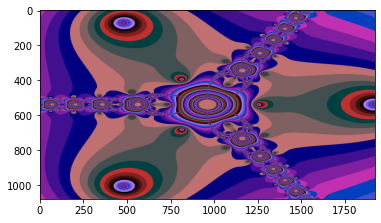

In [59]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image
80 #
Npx_X = 1920 #Numero de pixeles en x
Npx_Y = 1080 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523)